In [1]:
####### Importation des packages #########
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Ouvrir le fichier NetCDF contenant les données SST
ds = xr.open_mfdataset("./my_data_folder/eursst_folder/*.nc", combine="by_coords")

# Extraction des températures analysées (analysed_sst)
sst = ds["analysed_sst"]

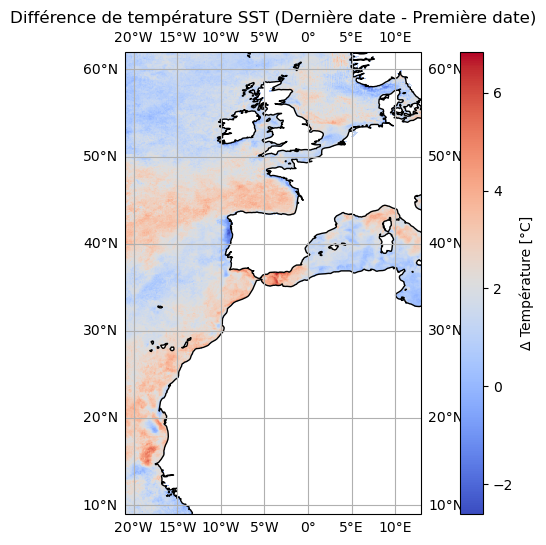

In [2]:
# Sélection des dates extrêmes
sst_oldest = sst.isel(time=0)  # Première date
sst_latest = sst.isel(time=-1) # Dernière date

# Calcul de la différence de température
sst_diff = sst_latest - sst_oldest

# Création de la figure
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent([-21, 13, 9, 62], crs=ccrs.PlateCarree())  # Définition de l'étendue des données

# Ajout de la différence de température
c = ax.pcolormesh(sst_diff.lon, sst_diff.lat, sst_diff, cmap="coolwarm", transform=ccrs.PlateCarree())

# Ajout des côtes et grilles
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.gridlines(draw_labels=True)

# Ajout d'une barre de couleur
cbar = plt.colorbar(c, ax=ax, orientation="vertical", fraction=0.05, pad=0.05)
cbar.set_label("Δ Température [°C]")

# Titre
plt.title("Différence de température SST (Dernière date - Première date)")

# Affichage
plt.savefig("./my_data_folder/diff_sst_map.png", bbox_inches="tight", dpi=300)
plt.show()

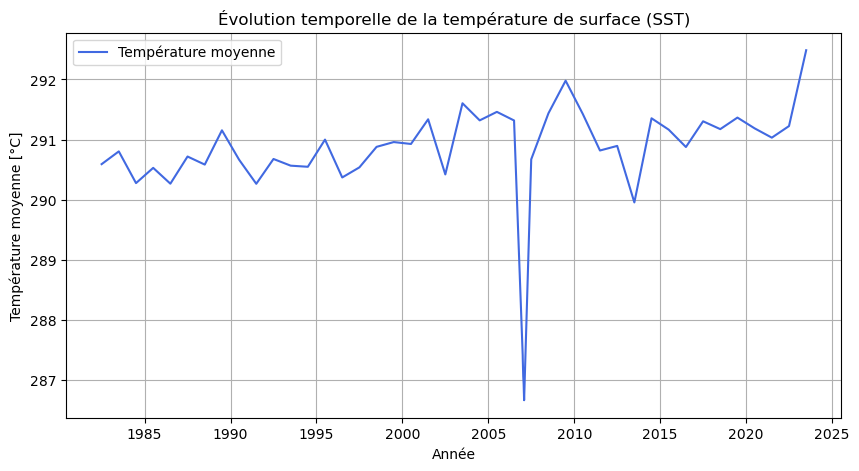

In [3]:
# Moyenne spatiale sur toute la région
sst_mean = sst.mean(dim=["lat", "lon"])

# Création du graphique
plt.figure(figsize=(10, 5))
plt.plot(sst_mean.time, sst_mean, label="Température moyenne", color="royalblue")

# Ajout des labels et titre
plt.xlabel("Année")
plt.ylabel("Température moyenne [°K]")
plt.title("Évolution temporelle de la température de surface (SST)")
plt.legend()
plt.grid()

# Enregistrement de l'image
plt.savefig("./my_data_folder/sst_time_series.png", bbox_inches="tight", dpi=300)

# Affichage
plt.show()

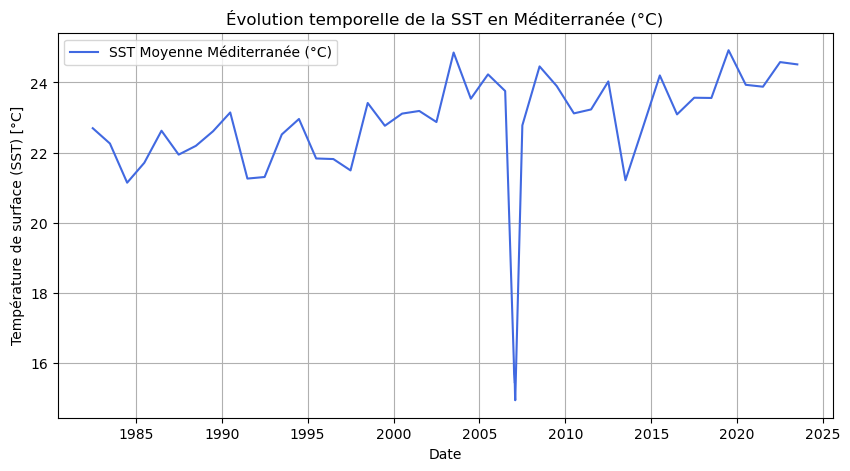

In [4]:
# Définir les limites géographiques de la Méditerranée
lat_min = 30   # Latitude minimale (30°N)
lat_max = 45   # Latitude maximale (45°N)
lon_min = -5   # Longitude minimale (5°W)
lon_max = 37   # Longitude maximale (37°E)

# Extraire les données SST dans la zone méditerranéenne
sst_mediterranean = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Calculer la moyenne de la SST sur cette zone (moyenne spatiale)
sst_mean_mediterranean = sst_mediterranean.mean(dim=["lat", "lon"])

# Création du graphique pour l'évolution temporelle de la SST moyenne en Méditerranée en Celsius
plt.figure(figsize=(10, 5))
plt.plot(sst_mean_mediterranean.time, sst_mean_mediterranean - 273.15, label="SST Moyenne Méditerranée (°C)", color="royalblue")

# Ajout des labels et du titre
plt.xlabel("Date")
plt.ylabel("Température de surface (SST) [°C]")
plt.title("Évolution temporelle de la SST en Méditerranée (°C)")
plt.legend()
plt.grid()

# Affichage
plt.show()



